# Investigate a Dataset
No show appointment

# Table of contents
- introduction
- Data wrangling
- Expolatory Data analysis
- Conclusions


# Introduction
## the TMDB Movies dataset is used in this data analysis project 
this dataset is available on kaggle.com and contains information about more than 10 thousands movies collected from The Movie Database (TMDb), including user ratings and revenue and has 21 columns.
### questions used to analyse this dataset
1. which moveis had highest and lowest budgets.
2. what are the movies with best profits and lowest.
3. the highest revenue earnd by movies.
4. the lowest revenue earnd by mobies.
5. what is the average time for the movies.


In [6]:
#importing libraries
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling
    After reviewing the data set and asking questions for analysis, we will keep only relevant data by deleting any unused data so that we can make our calculations simple and easy to understand.


## General Properties
    

In [7]:
#this step is to load the data and print some commands that help us in analysing the data
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
#data description 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
#data shape
df.shape

(10866, 21)

# Data cleaning 
1. remove and delete unneccessary columns
2. find duplicate and remove it
3. find movies with zero values or null
4. replace release date column into date format.
5. replace zero values with NAN

## 1. Drop unnecessary columns
drop some columns that will not be used in the analysis process.


In [16]:
df.drop(['id', 'imdb_id',   'homepage',  'tagline', 'overview', 'production_companies', 'keywords', 'popularity', 'vote_average', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


## 2. Remove duplicates 
firstly we will look at the database

In [17]:
rows, col = df.shape
#We need to reduce the count of row by one as contain header row also.
print('There are {} total number of movies and {} no.of columns in it.'.format(rows-1, col))

There are 10865 total number of movies and 9 no.of columns in it.


In [19]:
#remove the duplicates 
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

print('There are now {} total number of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 9 no.of columns in it.


## 3. deleting the 0 values from the budeget and revenue columns.

In [20]:
temp_list= ['budget', 'revenue']
df[temp_list]= df[temp_list].replace(0,np.NAN)
df.dropna(subset = temp_list, inplace = True)

rows, col = df.shape
print('we now have only {} no.of movies.'.format(rows-1))


we now have only 3853 no.of movies.


## 4. replace release date column into date format.

In [24]:
df.release_date = pd.to_datetime(df['release_date'])
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


## 5. replace zero values with NAN

In [26]:
change_type = ['budget', 'revenue']
df[change_type]= df[change_type].applymap(np.int64)
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [27]:
df.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [34]:
#calculate the mean
def mean_calculation(mean):
    return mean.mean()

In [43]:
#function to show plots to not repeate code
def showplots(df,xvalues, stat, color='blue'):
    df[xvalues].agg(stat).plot.bar(color = color,
                                  width=0.9,
                                  rot=0,
                                  figsize=[12.70,7.27])
    plt.yticks(color='blue')
    plt.xlabel(f'{" and ".join(xvalues)}'.title())
    plt.ylabel(f'{stat} values(10M)'.title())
    plt.title(f"{stat} of budgets and revenue".title())


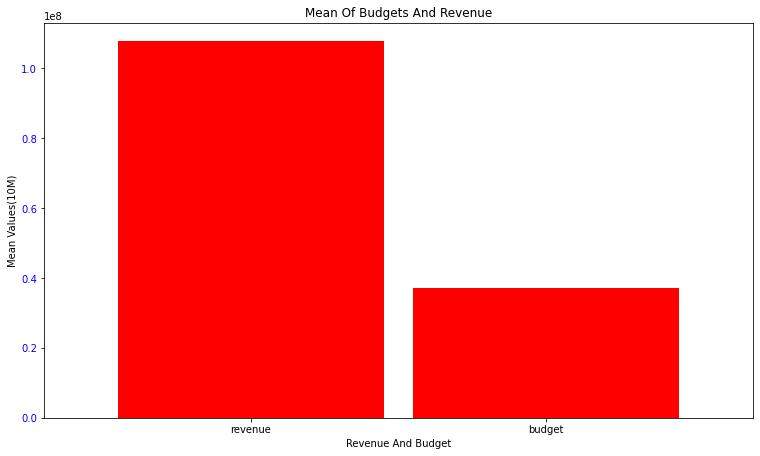

In [44]:
showplots(df,['revenue','budget'], stat='mean', color='red')

## Research Questions

In [46]:
# to find the mean of the movies budget
mean_budget = mean_calculation(df['budget'])

print(mean_budget)

37203696.954852104


In [50]:
# mean of movies revenue
mean_revenue = mean_calculation(df['revenue'])

print(mean_revenue)

107686616.09807992


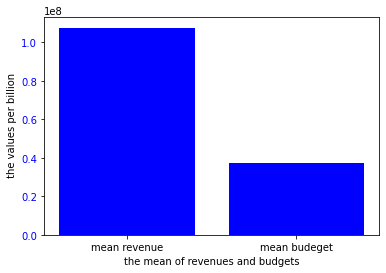

In [51]:
#plot to compare and show mean of the revenue and mean of budget
x = np.array(["mean revenue" , "mean budeget"])
y = mean_revenue, mean_budget
plt.bar(x,y, color ='blue')

plt.yticks(color='blue')
plt.xlabel('the mean of revenues and budgets')
plt.ylabel(' the values per billion')
plt.show()

In [52]:
# find the max budget
max_budget = df['budget'].max()
print(max_budget)

425000000


In [53]:
# find the max revenue
max_revenue = df['revenue'].max()
print(max_revenue)

2781505847


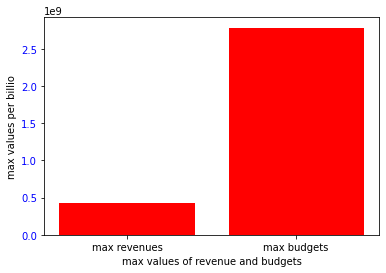

In [55]:
# draw plot of max budgets and revenues
x = np.array(["max revenues", "max budgets"])
y = max_budget, max_revenue

plt.bar(x, y, color= 'red')

plt.yticks(color='blue')
plt.xlabel('max values of revenue and budgets')
plt.ylabel('max values per billion')

plt.show()

In [59]:
# calculate the total budget and revenue of the all movies
total_budgets = df['budget'].sum()
print("the total budgets is", total_budgets)


total_revenues = df['revenue'].sum()
print("the total revenues is", total_revenues)


the total budgets is 143383048064
the total revenues is 415024218442


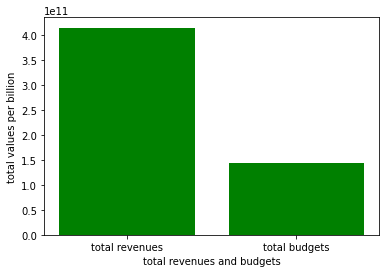

In [61]:
x = np.array(["total revenues", "total budgets"])
y = total_revenues, total_budgets

plt.bar(x, y, color = "green")

plt.yticks(color='black')
plt.xlabel("total revenues and budgets")
plt.ylabel("total values per billion")

plt.show()

[Text(0.5, 0, 'minutes'), Text(0, 0.5, 'number of movies')]

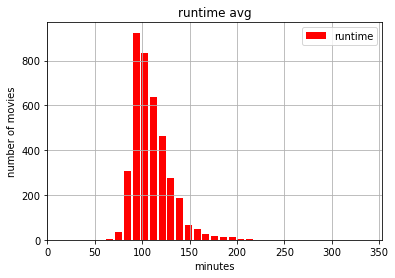

In [62]:
#runtime plot
plot_runtime = df['runtime'].plot(kind='hist',
                                 grid=True,
                                 legend=True,
                                 title='runtime avg',
                                 rwidth=0.8,
                                 bins=35,
                                 color='red')
plot_runtime.set(xlabel='minutes', ylabel='number of movies')

In [63]:
#calculate the mean of the movies runtime
df['runtime'].mean()

109.22029060716139

In [65]:
df.head(5)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


In [73]:
# total movies that considered as specific genres

all_action = len(df[df['genres'].str.contains('Action') == True])
all_comedy = len(df[df['genres'].str.contains('Comedy') == True])
all_fiction = len(df[df['genres'].str.contains('Fiction') == True])
all_fantasy = len(df[df['genres'].str.contains('Fantasy') == True])
print(all_action)

1085


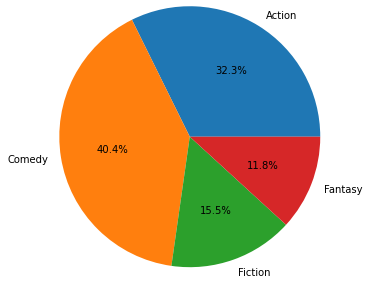

In [76]:
labels = 'Action', 'Comedy', 'Fiction', 'Fantasy'
values = [all_action, all_comedy, all_fiction, all_fantasy]

plt.pie(values, labels=labels, radius= 1.5, autopct='%1.1f%%')
plt.show()

# conclusion
on this point we came out with some intersting facts and analysis on the movies dataset. We figured out the following statistics

- we can see that movies is very profitable, the revenue total is $432,720,192,875 while total of investment is to low comparsing with proft, which is $158,922,868,089
-avarage of movies budgets is $30,739,432.
-avarage of movies revenue is $89,220,658.
-avarage of movies length is 102 minutes.

# limtation
- The dataset contains a lot of information covering over 10 thousand movies information
- We dropped many missing values of budget and revenue, so might skew our analysis and could show unintentional bias towards the relationship being analyzed.